In [0]:
#importando pacotes
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import numpy
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [159]:
# lendo o dataset e
diabetes = pd.read_csv('/content/gdrive/My Drive/diabetes.csv')
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [160]:
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [0]:
#definindo X e Y
X = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']

In [0]:
#preprocessamento
from sklearn.preprocessing import scale
X = scale(X)

In [0]:
#dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
#one hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [0]:
#definindo o modelo e a arquitetura da rede
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [0]:
# compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [167]:
# treinando
model.fit(X_train, y_train, epochs=1000, batch_size=10)

Epoch 1/1000
514/514 [==============================] - 0s 347us/step - loss: 0.7809 - accuracy: 0.5039
Epoch 2/1000
514/514 [==============================] - 0s 121us/step - loss: 0.7021 - accuracy: 0.5642
Epoch 3/1000
514/514 [==============================] - 0s 126us/step - loss: 0.6590 - accuracy: 0.6372
Epoch 4/1000
514/514 [==============================] - 0s 119us/step - loss: 0.6260 - accuracy: 0.6975
Epoch 5/1000
514/514 [==============================] - 0s 140us/step - loss: 0.5962 - accuracy: 0.7247
Epoch 6/1000
514/514 [==============================] - 0s 144us/step - loss: 0.5681 - accuracy: 0.7432
Epoch 7/1000
514/514 [==============================] - 0s 128us/step - loss: 0.5420 - accuracy: 0.7646
Epoch 8/1000
514/514 [==============================] - 0s 122us/step - loss: 0.5203 - accuracy: 0.7772
Epoch 9/1000
514/514 [==============================] - 0s 123us/step - loss: 0.5036 - accuracy: 0.7792
Epoch 10/1000
514/514 [==============================] - 0s 125u

In [171]:
#fazendo predição e avaliação

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)

0.6929133858267716

Text(0.5, 0, 'loss')

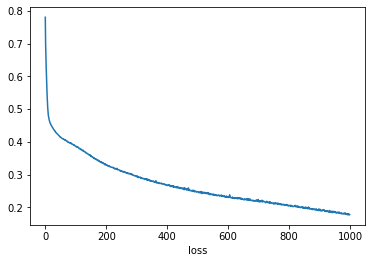

In [172]:
#plotando loss X número de épocas

plt.plot(model.history.epoch, model.history.history['loss'])
plt.xlabel('epochs')
plt.xlabel('loss')

In [173]:
#matriz de confusão
expected = y_test
predicted = y_pred
results = confusion_matrix(expected, predicted)
print(results)

[[123  45]
 [ 33  53]]
